In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration( gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])

In [3]:
tf.__version__

'2.0.1'

In [4]:
tf.test.is_gpu_available()

True

In [5]:
# tf.compat.v1.reset_default_graph()

### What does img_augument do?

In [6]:
def img_augument(img,lab):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.random_hue(img,0.1)
    img = tf.image.random_contrast(img, 0.5, 2)
    return img, lab

In [7]:
# test what augmentation have done
test_img = tf.io.read_file('test.jpg')
test_img = tf.image.decode_jpeg(test_img)

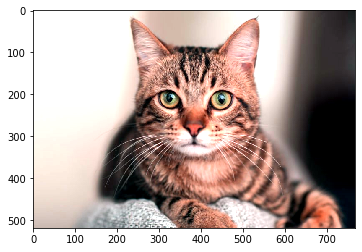

In [8]:
plt.imshow(img_augument(test_img,'cat')[0].numpy())

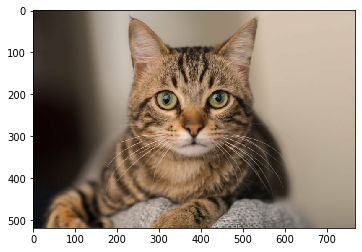

In [9]:
plt.imshow(test_img.numpy())

### load dataset

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  #50000 train, 10000 test

In [11]:
y_train[1]

array([9], dtype=uint8)

In [12]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [13]:
'''
batch size 
'''

batch_size = 50   ## this is what previous tests are done with
# batch_size = 5
autotune=tf.data.experimental.AUTOTUNE
buffer_size = x_train.shape[0]

In [14]:
category_index=[]     # if want to reduce the training set

for i in range(10):
    index0 = np.where(y_train == i)
    index = index0[0]
    np.random.shuffle(index)
    category_index.append(index)

new_index=[]
for i in range(10):
    new_index.append(category_index[i][0:400])    
new_index=np.concatenate(new_index)
new_index.shape

(4000,)

In [15]:
augment=False
x_tr=tf.data.Dataset.from_tensor_slices(x_train[new_index])
y_tr=tf.data.Dataset.from_tensor_slices(y_train[new_index])
train_set=tf.data.Dataset.zip((x_tr, y_tr))
if augment==True:
    train_set=train_set.map(img_augument).shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)
else:
    train_set=train_set.shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)

In [16]:
x_te=tf.data.Dataset.from_tensor_slices(x_test)
y_te=tf.data.Dataset.from_tensor_slices(y_test)
test_set=tf.data.Dataset.zip((x_te, y_te))
test_set=test_set.repeat().batch(200).prefetch(buffer_size=autotune)

### model

In [17]:
from models import ANN_model

model=ANN_model()

### train model

In [18]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [19]:
# lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.8, min_lr=0.0001)

In [20]:
history=model.fit(train_set,
                  epochs=5000,
                  steps_per_epoch=new_index.shape[0]//batch_size,
                  validation_data=test_set,
                  validation_steps=10000//200,
#                   callbacks=[es_callback],
                  verbose=1)
#                   callbacks=[es_callback,lr_callback])

Train for 80 steps, validate for 50 steps
Epoch 1/5000
80/80 [==============================] - 4s 53ms/step - loss: 2.5736 - acc: 0.1610 - val_loss: 3.5108 - val_acc: 0.1684
Epoch 2/5000
80/80 [==============================] - 1s 15ms/step - loss: 2.1777 - acc: 0.2262 - val_loss: 1.9062 - val_acc: 0.3235
Epoch 3/5000
80/80 [==============================] - 1s 15ms/step - loss: 1.9674 - acc: 0.2948 - val_loss: 1.8677 - val_acc: 0.3334
Epoch 4/5000
80/80 [==============================] - 1s 15ms/step - loss: 1.8298 - acc: 0.3355 - val_loss: 1.6871 - val_acc: 0.3832
Epoch 5/5000
80/80 [==============================] - 1s 15ms/step - loss: 1.7078 - acc: 0.3717 - val_loss: 1.6409 - val_acc: 0.3907
Epoch 6/5000
80/80 [==============================] - 1s 15ms/step - loss: 1.6230 - acc: 0.4110 - val_loss: 1.5198 - val_acc: 0.4431
Epoch 7/5000
80/80 [==============================] - 1s 15ms/step - loss: 1.5382 - acc: 0.4420 - val_loss: 1.6944 - val_acc: 0.4113
Epoch 8/5000
80/80 [=======

Epoch 62/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1684 - acc: 0.9433 - val_loss: 1.5764 - val_acc: 0.6170
Epoch 63/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1747 - acc: 0.9445 - val_loss: 1.6725 - val_acc: 0.6078
Epoch 64/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1542 - acc: 0.9475 - val_loss: 1.5934 - val_acc: 0.6179
Epoch 65/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1565 - acc: 0.9500 - val_loss: 1.7130 - val_acc: 0.6179
Epoch 66/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1788 - acc: 0.9388 - val_loss: 1.6740 - val_acc: 0.6077
Epoch 67/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1772 - acc: 0.9433 - val_loss: 1.7430 - val_acc: 0.6077
Epoch 68/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1717 - acc: 0.9395 - val_loss: 1.6393 - val_acc: 0.6156
Epoch 69/5000
80/80 [==============================] - 1s 15ms

Epoch 123/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1049 - acc: 0.9660 - val_loss: 1.9428 - val_acc: 0.6017
Epoch 124/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0850 - acc: 0.9737 - val_loss: 1.8364 - val_acc: 0.6214
Epoch 125/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0986 - acc: 0.9638 - val_loss: 1.9536 - val_acc: 0.6088
Epoch 126/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1003 - acc: 0.9660 - val_loss: 2.0917 - val_acc: 0.6100
Epoch 127/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1073 - acc: 0.9655 - val_loss: 1.9553 - val_acc: 0.6171
Epoch 128/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0908 - acc: 0.9712 - val_loss: 1.8295 - val_acc: 0.6201
Epoch 129/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.1104 - acc: 0.9655 - val_loss: 2.0313 - val_acc: 0.6126
Epoch 130/5000
80/80 [==============================] -

Epoch 184/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0680 - acc: 0.9768 - val_loss: 2.1557 - val_acc: 0.6048
Epoch 185/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0559 - acc: 0.9843 - val_loss: 1.9710 - val_acc: 0.6138
Epoch 186/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0515 - acc: 0.9837 - val_loss: 1.8775 - val_acc: 0.6282
Epoch 187/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0635 - acc: 0.9803 - val_loss: 2.1166 - val_acc: 0.6136
Epoch 188/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0589 - acc: 0.9810 - val_loss: 1.9924 - val_acc: 0.6227
Epoch 189/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0625 - acc: 0.9822 - val_loss: 1.9393 - val_acc: 0.6254
Epoch 190/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0525 - acc: 0.9810 - val_loss: 1.8699 - val_acc: 0.6273
Epoch 191/5000
80/80 [==============================] -

Epoch 245/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0587 - acc: 0.9822 - val_loss: 2.1407 - val_acc: 0.6159
Epoch 246/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0619 - acc: 0.9810 - val_loss: 2.1349 - val_acc: 0.6177
Epoch 247/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0507 - acc: 0.9843 - val_loss: 2.1176 - val_acc: 0.6193
Epoch 248/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0431 - acc: 0.9860 - val_loss: 1.9397 - val_acc: 0.6302
Epoch 249/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0491 - acc: 0.9845 - val_loss: 2.0511 - val_acc: 0.6213
Epoch 250/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0421 - acc: 0.9885 - val_loss: 2.0102 - val_acc: 0.6210
Epoch 251/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0533 - acc: 0.9822 - val_loss: 2.0238 - val_acc: 0.6186
Epoch 252/5000
80/80 [==============================] -

Epoch 306/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0328 - acc: 0.9902 - val_loss: 2.0177 - val_acc: 0.6291
Epoch 307/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0526 - acc: 0.9852 - val_loss: 2.1605 - val_acc: 0.6225
Epoch 308/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0445 - acc: 0.9885 - val_loss: 2.0464 - val_acc: 0.6350
Epoch 309/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0438 - acc: 0.9868 - val_loss: 2.1173 - val_acc: 0.6346
Epoch 310/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0361 - acc: 0.9898 - val_loss: 2.0133 - val_acc: 0.6301
Epoch 311/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0378 - acc: 0.9883 - val_loss: 2.0366 - val_acc: 0.6259
Epoch 312/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0375 - acc: 0.9862 - val_loss: 2.0819 - val_acc: 0.6170
Epoch 313/5000
80/80 [==============================] -

Epoch 367/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0358 - acc: 0.9880 - val_loss: 2.1364 - val_acc: 0.6258
Epoch 368/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0397 - acc: 0.9877 - val_loss: 2.0246 - val_acc: 0.6278
Epoch 369/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0325 - acc: 0.9890 - val_loss: 2.1585 - val_acc: 0.6260
Epoch 370/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0471 - acc: 0.9868 - val_loss: 2.1298 - val_acc: 0.6257
Epoch 371/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0393 - acc: 0.9875 - val_loss: 2.1739 - val_acc: 0.6319
Epoch 372/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0390 - acc: 0.9860 - val_loss: 2.2141 - val_acc: 0.6318
Epoch 373/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0417 - acc: 0.9860 - val_loss: 2.0365 - val_acc: 0.6321
Epoch 374/5000
80/80 [==============================] -

Epoch 428/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0328 - acc: 0.9902 - val_loss: 2.0803 - val_acc: 0.6334
Epoch 429/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0335 - acc: 0.9893 - val_loss: 2.0236 - val_acc: 0.6292
Epoch 430/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0312 - acc: 0.9895 - val_loss: 2.0601 - val_acc: 0.6301
Epoch 431/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0309 - acc: 0.9895 - val_loss: 2.1043 - val_acc: 0.6360
Epoch 432/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0385 - acc: 0.9893 - val_loss: 2.0855 - val_acc: 0.6222
Epoch 433/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0341 - acc: 0.9893 - val_loss: 2.1039 - val_acc: 0.6338
Epoch 434/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0422 - acc: 0.9858 - val_loss: 2.1351 - val_acc: 0.6286
Epoch 435/5000
80/80 [==============================] -

Epoch 489/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0340 - acc: 0.9887 - val_loss: 2.1787 - val_acc: 0.6246
Epoch 490/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0294 - acc: 0.9908 - val_loss: 2.0410 - val_acc: 0.6333
Epoch 491/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0243 - acc: 0.9912 - val_loss: 2.0668 - val_acc: 0.6334
Epoch 492/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0222 - acc: 0.9925 - val_loss: 2.3268 - val_acc: 0.6210
Epoch 493/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0208 - acc: 0.9923 - val_loss: 2.1512 - val_acc: 0.6320
Epoch 494/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0251 - acc: 0.9918 - val_loss: 2.1923 - val_acc: 0.6324
Epoch 495/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0327 - acc: 0.9893 - val_loss: 2.0576 - val_acc: 0.6398
Epoch 496/5000
80/80 [==============================] -

Epoch 550/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0248 - acc: 0.9925 - val_loss: 2.0400 - val_acc: 0.6383
Epoch 551/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0278 - acc: 0.9918 - val_loss: 1.9859 - val_acc: 0.6283
Epoch 552/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0314 - acc: 0.9927 - val_loss: 2.2782 - val_acc: 0.6223
Epoch 553/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0239 - acc: 0.9920 - val_loss: 2.1551 - val_acc: 0.6323
Epoch 554/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0229 - acc: 0.9937 - val_loss: 2.0609 - val_acc: 0.6392
Epoch 555/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0232 - acc: 0.9937 - val_loss: 2.0517 - val_acc: 0.6333
Epoch 556/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0228 - acc: 0.9933 - val_loss: 2.1928 - val_acc: 0.6276
Epoch 557/5000
80/80 [==============================] -

80/80 [==============================] - 1s 15ms/step - loss: 0.0206 - acc: 0.9935 - val_loss: 2.1564 - val_acc: 0.6262
Epoch 611/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0192 - acc: 0.9930 - val_loss: 2.1065 - val_acc: 0.6322
Epoch 612/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0242 - acc: 0.9923 - val_loss: 2.0366 - val_acc: 0.6309
Epoch 613/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0297 - acc: 0.9902 - val_loss: 2.0123 - val_acc: 0.6263
Epoch 614/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0320 - acc: 0.9880 - val_loss: 2.3832 - val_acc: 0.6294
Epoch 615/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0300 - acc: 0.9912 - val_loss: 2.1609 - val_acc: 0.6304
Epoch 616/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0263 - acc: 0.9918 - val_loss: 2.0607 - val_acc: 0.6304
Epoch 617/5000
80/80 [==============================] - 1s 15ms/step -

Epoch 671/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0243 - acc: 0.9942 - val_loss: 2.2466 - val_acc: 0.6345
Epoch 672/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0276 - acc: 0.9910 - val_loss: 2.1740 - val_acc: 0.6312
Epoch 673/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0286 - acc: 0.9905 - val_loss: 2.1781 - val_acc: 0.6283
Epoch 674/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0185 - acc: 0.9942 - val_loss: 2.3887 - val_acc: 0.6193
Epoch 675/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0331 - acc: 0.9885 - val_loss: 2.2195 - val_acc: 0.6315
Epoch 676/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0258 - acc: 0.9918 - val_loss: 2.2539 - val_acc: 0.6384
Epoch 677/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0290 - acc: 0.9920 - val_loss: 2.3046 - val_acc: 0.6204
Epoch 678/5000
80/80 [==============================] -

Epoch 732/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0227 - acc: 0.9918 - val_loss: 2.2603 - val_acc: 0.6227
Epoch 733/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0213 - acc: 0.9925 - val_loss: 2.2532 - val_acc: 0.6319
Epoch 734/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0195 - acc: 0.9948 - val_loss: 2.2689 - val_acc: 0.6384
Epoch 735/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0205 - acc: 0.9940 - val_loss: 2.1721 - val_acc: 0.6340
Epoch 736/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0237 - acc: 0.9923 - val_loss: 2.3498 - val_acc: 0.6439
Epoch 737/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0217 - acc: 0.9930 - val_loss: 2.3227 - val_acc: 0.6296
Epoch 738/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0334 - acc: 0.9887 - val_loss: 2.4047 - val_acc: 0.6292
Epoch 739/5000
80/80 [==============================] -

Epoch 793/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0223 - acc: 0.9945 - val_loss: 2.3715 - val_acc: 0.6319
Epoch 794/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0216 - acc: 0.9933 - val_loss: 2.3124 - val_acc: 0.6292
Epoch 795/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0271 - acc: 0.9927 - val_loss: 2.1344 - val_acc: 0.6367
Epoch 796/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0193 - acc: 0.9930 - val_loss: 2.3992 - val_acc: 0.6221
Epoch 797/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0204 - acc: 0.9930 - val_loss: 2.2700 - val_acc: 0.6341
Epoch 798/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0193 - acc: 0.9930 - val_loss: 2.2520 - val_acc: 0.6332
Epoch 799/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0297 - acc: 0.9898 - val_loss: 2.3603 - val_acc: 0.6275
Epoch 800/5000
80/80 [==============================] -

80/80 [==============================] - 1s 15ms/step - loss: 0.0268 - acc: 0.9930 - val_loss: 2.4047 - val_acc: 0.6422
Epoch 854/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0200 - acc: 0.9945 - val_loss: 2.2447 - val_acc: 0.6371
Epoch 855/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0198 - acc: 0.9952 - val_loss: 2.2134 - val_acc: 0.6439
Epoch 856/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0252 - acc: 0.9935 - val_loss: 2.3791 - val_acc: 0.6201
Epoch 857/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0225 - acc: 0.9920 - val_loss: 2.2702 - val_acc: 0.6395
Epoch 858/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0354 - acc: 0.9915 - val_loss: 2.4236 - val_acc: 0.6301
Epoch 859/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0256 - acc: 0.9927 - val_loss: 2.2284 - val_acc: 0.6342
Epoch 860/5000
80/80 [==============================] - 1s 15ms/step -

Epoch 914/5000
80/80 [==============================] - 1s 17ms/step - loss: 0.0249 - acc: 0.9937 - val_loss: 2.0766 - val_acc: 0.6373
Epoch 915/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0235 - acc: 0.9942 - val_loss: 2.2265 - val_acc: 0.6295
Epoch 916/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0206 - acc: 0.9942 - val_loss: 2.2454 - val_acc: 0.6403
Epoch 917/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0156 - acc: 0.9950 - val_loss: 2.2850 - val_acc: 0.6398
Epoch 918/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0123 - acc: 0.9952 - val_loss: 2.1714 - val_acc: 0.6409
Epoch 919/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0213 - acc: 0.9942 - val_loss: 2.2104 - val_acc: 0.6422
Epoch 920/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0188 - acc: 0.9940 - val_loss: 2.6184 - val_acc: 0.6306
Epoch 921/5000
80/80 [==============================] -

Epoch 975/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0165 - acc: 0.9950 - val_loss: 2.1584 - val_acc: 0.6340
Epoch 976/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0175 - acc: 0.9942 - val_loss: 2.2035 - val_acc: 0.6432
Epoch 977/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0110 - acc: 0.9965 - val_loss: 2.3256 - val_acc: 0.6421
Epoch 978/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0194 - acc: 0.9930 - val_loss: 2.3204 - val_acc: 0.6389
Epoch 979/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0202 - acc: 0.9930 - val_loss: 2.2965 - val_acc: 0.6383
Epoch 980/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0173 - acc: 0.9948 - val_loss: 2.2327 - val_acc: 0.6360
Epoch 981/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0252 - acc: 0.9933 - val_loss: 2.2369 - val_acc: 0.6336
Epoch 982/5000
80/80 [==============================] -

80/80 [==============================] - 1s 15ms/step - loss: 0.0233 - acc: 0.9930 - val_loss: 2.1502 - val_acc: 0.6342
Epoch 1036/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0132 - acc: 0.9960 - val_loss: 2.2840 - val_acc: 0.6361
Epoch 1037/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 2.4650 - val_acc: 0.6435
Epoch 1038/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0192 - acc: 0.9937 - val_loss: 2.2795 - val_acc: 0.6367
Epoch 1039/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0126 - acc: 0.9958 - val_loss: 2.4413 - val_acc: 0.6381
Epoch 1040/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0159 - acc: 0.9948 - val_loss: 2.4838 - val_acc: 0.6381
Epoch 1041/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0144 - acc: 0.9948 - val_loss: 2.2972 - val_acc: 0.6416
Epoch 1042/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0307 - acc: 0.9910 - val_loss: 2.3583 - val_acc: 0.6358
Epoch 1096/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0111 - acc: 0.9965 - val_loss: 2.3723 - val_acc: 0.6415
Epoch 1097/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0143 - acc: 0.9952 - val_loss: 2.3982 - val_acc: 0.6454
Epoch 1098/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0205 - acc: 0.9950 - val_loss: 2.4227 - val_acc: 0.6381
Epoch 1099/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0110 - acc: 0.9962 - val_loss: 2.4061 - val_acc: 0.6331
Epoch 1100/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0147 - acc: 0.9955 - val_loss: 2.3499 - val_acc: 0.6461
Epoch 1101/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0177 - acc: 0.9952 - val_loss: 2.1642 - val_acc: 0.6432
Epoch 1102/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9977 - val_loss: 2.2357 - val_acc: 0.6432
Epoch 1156/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0124 - acc: 0.9960 - val_loss: 2.3313 - val_acc: 0.6422
Epoch 1157/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0134 - acc: 0.9952 - val_loss: 2.3181 - val_acc: 0.6425
Epoch 1158/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0122 - acc: 0.9950 - val_loss: 2.4169 - val_acc: 0.6388
Epoch 1159/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0154 - acc: 0.9962 - val_loss: 2.3564 - val_acc: 0.6393
Epoch 1160/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0082 - acc: 0.9977 - val_loss: 2.1868 - val_acc: 0.6347
Epoch 1161/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0135 - acc: 0.9950 - val_loss: 2.1743 - val_acc: 0.6420
Epoch 1162/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0206 - acc: 0.9935 - val_loss: 2.4349 - val_acc: 0.6327
Epoch 1216/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0197 - acc: 0.9950 - val_loss: 2.4447 - val_acc: 0.6353
Epoch 1217/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0161 - acc: 0.9950 - val_loss: 2.3349 - val_acc: 0.6354
Epoch 1218/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0230 - acc: 0.9927 - val_loss: 2.5036 - val_acc: 0.6304
Epoch 1219/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0186 - acc: 0.9945 - val_loss: 2.2035 - val_acc: 0.6292
Epoch 1220/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0206 - acc: 0.9958 - val_loss: 2.2892 - val_acc: 0.6337
Epoch 1221/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0154 - acc: 0.9955 - val_loss: 2.3313 - val_acc: 0.6372
Epoch 1222/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0171 - acc: 0.9937 - val_loss: 2.4331 - val_acc: 0.6369
Epoch 1276/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 2.7332 - val_acc: 0.6298
Epoch 1277/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0149 - acc: 0.9952 - val_loss: 2.6101 - val_acc: 0.6402
Epoch 1278/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0203 - acc: 0.9927 - val_loss: 2.3569 - val_acc: 0.6385
Epoch 1279/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0185 - acc: 0.9960 - val_loss: 2.5157 - val_acc: 0.6390
Epoch 1280/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0122 - acc: 0.9967 - val_loss: 2.4266 - val_acc: 0.6438
Epoch 1281/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0084 - acc: 0.9967 - val_loss: 2.3226 - val_acc: 0.6399
Epoch 1282/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9965 - val_loss: 2.4513 - val_acc: 0.6361
Epoch 1336/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0171 - acc: 0.9965 - val_loss: 2.3885 - val_acc: 0.6394
Epoch 1337/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0199 - acc: 0.9952 - val_loss: 2.3012 - val_acc: 0.6344
Epoch 1338/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0107 - acc: 0.9962 - val_loss: 2.4077 - val_acc: 0.6393
Epoch 1339/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 2.4591 - val_acc: 0.6466
Epoch 1340/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0127 - acc: 0.9960 - val_loss: 2.4127 - val_acc: 0.6384
Epoch 1341/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0181 - acc: 0.9948 - val_loss: 2.6921 - val_acc: 0.6330
Epoch 1342/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0139 - acc: 0.9955 - val_loss: 2.6096 - val_acc: 0.6413
Epoch 1396/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0081 - acc: 0.9980 - val_loss: 2.3724 - val_acc: 0.6410
Epoch 1397/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0150 - acc: 0.9950 - val_loss: 2.5053 - val_acc: 0.6384
Epoch 1398/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0101 - acc: 0.9970 - val_loss: 2.2758 - val_acc: 0.6379
Epoch 1399/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0147 - acc: 0.9960 - val_loss: 2.4113 - val_acc: 0.6421
Epoch 1400/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0097 - acc: 0.9962 - val_loss: 2.4834 - val_acc: 0.6394
Epoch 1401/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0102 - acc: 0.9960 - val_loss: 2.7560 - val_acc: 0.6352
Epoch 1402/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9973 - val_loss: 2.3075 - val_acc: 0.6417
Epoch 1456/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0115 - acc: 0.9965 - val_loss: 2.4642 - val_acc: 0.6450
Epoch 1457/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0096 - acc: 0.9965 - val_loss: 2.4086 - val_acc: 0.6435
Epoch 1458/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0078 - acc: 0.9967 - val_loss: 2.3343 - val_acc: 0.6448
Epoch 1459/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0119 - acc: 0.9958 - val_loss: 2.2920 - val_acc: 0.6391
Epoch 1460/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0243 - acc: 0.9942 - val_loss: 2.6433 - val_acc: 0.6308
Epoch 1461/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0169 - acc: 0.9958 - val_loss: 2.6303 - val_acc: 0.6408
Epoch 1462/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0118 - acc: 0.9967 - val_loss: 2.5212 - val_acc: 0.6484
Epoch 1516/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0207 - acc: 0.9930 - val_loss: 2.4823 - val_acc: 0.6401
Epoch 1517/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0188 - acc: 0.9942 - val_loss: 2.2477 - val_acc: 0.6386
Epoch 1518/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0223 - acc: 0.9945 - val_loss: 2.4571 - val_acc: 0.6349
Epoch 1519/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0101 - acc: 0.9965 - val_loss: 2.5412 - val_acc: 0.6413
Epoch 1520/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0116 - acc: 0.9962 - val_loss: 2.4044 - val_acc: 0.6430
Epoch 1521/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9965 - val_loss: 2.3851 - val_acc: 0.6453
Epoch 1522/5000
80/80 [==============================] - 1s 16ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0160 - acc: 0.9962 - val_loss: 2.3656 - val_acc: 0.6422
Epoch 1576/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0116 - acc: 0.9973 - val_loss: 2.7238 - val_acc: 0.6411
Epoch 1577/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0116 - acc: 0.9965 - val_loss: 2.4424 - val_acc: 0.6472
Epoch 1578/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9983 - val_loss: 2.4704 - val_acc: 0.6481
Epoch 1579/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0167 - acc: 0.9950 - val_loss: 2.3893 - val_acc: 0.6468
Epoch 1580/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0135 - acc: 0.9975 - val_loss: 2.4357 - val_acc: 0.6439
Epoch 1581/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0105 - acc: 0.9973 - val_loss: 2.5244 - val_acc: 0.6434
Epoch 1582/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0076 - acc: 0.9980 - val_loss: 2.6053 - val_acc: 0.6451
Epoch 1636/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0094 - acc: 0.9977 - val_loss: 2.5675 - val_acc: 0.6460
Epoch 1637/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9955 - val_loss: 2.3461 - val_acc: 0.6468
Epoch 1638/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0195 - acc: 0.9937 - val_loss: 2.6992 - val_acc: 0.6352
Epoch 1639/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0164 - acc: 0.9958 - val_loss: 2.6158 - val_acc: 0.6420
Epoch 1640/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0190 - acc: 0.9950 - val_loss: 2.3665 - val_acc: 0.6388
Epoch 1641/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0131 - acc: 0.9965 - val_loss: 2.5025 - val_acc: 0.6368
Epoch 1642/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9973 - val_loss: 2.6239 - val_acc: 0.6363
Epoch 1696/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0116 - acc: 0.9973 - val_loss: 2.7243 - val_acc: 0.6231
Epoch 1697/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0127 - acc: 0.9958 - val_loss: 2.4545 - val_acc: 0.6345
Epoch 1698/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0196 - acc: 0.9948 - val_loss: 2.7088 - val_acc: 0.6378
Epoch 1699/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0128 - acc: 0.9952 - val_loss: 2.7942 - val_acc: 0.6401
Epoch 1700/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0173 - acc: 0.9952 - val_loss: 2.3563 - val_acc: 0.6277
Epoch 1701/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0141 - acc: 0.9958 - val_loss: 2.6102 - val_acc: 0.6432
Epoch 1702/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0080 - acc: 0.9980 - val_loss: 2.6240 - val_acc: 0.6438
Epoch 1756/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9970 - val_loss: 2.5233 - val_acc: 0.6461
Epoch 1757/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0109 - acc: 0.9967 - val_loss: 2.6121 - val_acc: 0.6374
Epoch 1758/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0137 - acc: 0.9960 - val_loss: 2.7656 - val_acc: 0.6331
Epoch 1759/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0173 - acc: 0.9948 - val_loss: 2.2793 - val_acc: 0.6367
Epoch 1760/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0118 - acc: 0.9970 - val_loss: 2.7176 - val_acc: 0.6350
Epoch 1761/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0133 - acc: 0.9962 - val_loss: 2.4480 - val_acc: 0.6321
Epoch 1762/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 16ms/step - loss: 0.0111 - acc: 0.9975 - val_loss: 2.7123 - val_acc: 0.6361
Epoch 1816/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0140 - acc: 0.9960 - val_loss: 2.6192 - val_acc: 0.6424
Epoch 1817/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0120 - acc: 0.9973 - val_loss: 2.4508 - val_acc: 0.6423
Epoch 1818/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9975 - val_loss: 2.8084 - val_acc: 0.6363
Epoch 1819/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0113 - acc: 0.9977 - val_loss: 2.5407 - val_acc: 0.6395
Epoch 1820/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0165 - acc: 0.9958 - val_loss: 2.4771 - val_acc: 0.6364
Epoch 1821/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0114 - acc: 0.9970 - val_loss: 2.8368 - val_acc: 0.6452
Epoch 1822/5000
80/80 [==============================] - 1s 16ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0109 - acc: 0.9970 - val_loss: 2.4800 - val_acc: 0.6418
Epoch 1876/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0122 - acc: 0.9962 - val_loss: 2.7621 - val_acc: 0.6268
Epoch 1877/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0177 - acc: 0.9942 - val_loss: 2.2837 - val_acc: 0.6354
Epoch 1878/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9967 - val_loss: 2.4095 - val_acc: 0.6393
Epoch 1879/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0133 - acc: 0.9977 - val_loss: 2.8915 - val_acc: 0.6355
Epoch 1880/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0107 - acc: 0.9962 - val_loss: 2.5471 - val_acc: 0.6435
Epoch 1881/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0079 - acc: 0.9973 - val_loss: 2.8851 - val_acc: 0.6355
Epoch 1882/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0080 - acc: 0.9973 - val_loss: 2.5376 - val_acc: 0.6412
Epoch 1936/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9973 - val_loss: 2.8040 - val_acc: 0.6444
Epoch 1937/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0110 - acc: 0.9965 - val_loss: 2.7248 - val_acc: 0.6435
Epoch 1938/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0105 - acc: 0.9973 - val_loss: 2.4837 - val_acc: 0.6400
Epoch 1939/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 2.4007 - val_acc: 0.6236
Epoch 1940/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0078 - acc: 0.9980 - val_loss: 2.7643 - val_acc: 0.6418
Epoch 1941/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 2.7042 - val_acc: 0.6459
Epoch 1942/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0054 - acc: 0.9983 - val_loss: 2.5442 - val_acc: 0.6470
Epoch 1996/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0092 - acc: 0.9975 - val_loss: 2.4148 - val_acc: 0.6404
Epoch 1997/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0079 - acc: 0.9983 - val_loss: 2.7123 - val_acc: 0.6447
Epoch 1998/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0200 - acc: 0.9962 - val_loss: 2.6017 - val_acc: 0.6435
Epoch 1999/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0090 - acc: 0.9975 - val_loss: 2.7190 - val_acc: 0.6448
Epoch 2000/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9973 - val_loss: 2.5140 - val_acc: 0.6422
Epoch 2001/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9980 - val_loss: 2.4118 - val_acc: 0.6439
Epoch 2002/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0125 - acc: 0.9967 - val_loss: 2.5751 - val_acc: 0.6493
Epoch 2056/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0090 - acc: 0.9975 - val_loss: 2.4299 - val_acc: 0.6423
Epoch 2057/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0128 - acc: 0.9962 - val_loss: 2.8110 - val_acc: 0.6401
Epoch 2058/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0119 - acc: 0.9967 - val_loss: 2.3690 - val_acc: 0.6371
Epoch 2059/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0112 - acc: 0.9960 - val_loss: 2.7131 - val_acc: 0.6442
Epoch 2060/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0108 - acc: 0.9975 - val_loss: 2.9312 - val_acc: 0.6434
Epoch 2061/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9973 - val_loss: 2.6987 - val_acc: 0.6352
Epoch 2062/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0146 - acc: 0.9952 - val_loss: 2.5745 - val_acc: 0.6367
Epoch 2116/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0144 - acc: 0.9950 - val_loss: 2.5420 - val_acc: 0.6431
Epoch 2117/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0131 - acc: 0.9962 - val_loss: 2.8186 - val_acc: 0.6446
Epoch 2118/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0137 - acc: 0.9967 - val_loss: 3.0358 - val_acc: 0.6441
Epoch 2119/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9980 - val_loss: 2.3483 - val_acc: 0.6401
Epoch 2120/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0129 - acc: 0.9948 - val_loss: 2.7673 - val_acc: 0.6417
Epoch 2121/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0127 - acc: 0.9955 - val_loss: 2.5416 - val_acc: 0.6448
Epoch 2122/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0153 - acc: 0.9960 - val_loss: 2.9439 - val_acc: 0.6410
Epoch 2176/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0126 - acc: 0.9975 - val_loss: 2.5814 - val_acc: 0.6424
Epoch 2177/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0114 - acc: 0.9967 - val_loss: 3.0962 - val_acc: 0.6378
Epoch 2178/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0133 - acc: 0.9958 - val_loss: 2.4699 - val_acc: 0.6411
Epoch 2179/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0146 - acc: 0.9962 - val_loss: 2.5358 - val_acc: 0.6404
Epoch 2180/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0115 - acc: 0.9955 - val_loss: 2.8672 - val_acc: 0.6389
Epoch 2181/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0104 - acc: 0.9975 - val_loss: 2.7400 - val_acc: 0.6450
Epoch 2182/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 16ms/step - loss: 0.0104 - acc: 0.9970 - val_loss: 2.9008 - val_acc: 0.6425
Epoch 2236/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0103 - acc: 0.9970 - val_loss: 2.5505 - val_acc: 0.6421
Epoch 2237/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0096 - acc: 0.9970 - val_loss: 2.7124 - val_acc: 0.6417
Epoch 2238/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0215 - acc: 0.9942 - val_loss: 2.8599 - val_acc: 0.6435
Epoch 2239/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0142 - acc: 0.9960 - val_loss: 2.8121 - val_acc: 0.6412
Epoch 2240/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0105 - acc: 0.9967 - val_loss: 2.6043 - val_acc: 0.6353
Epoch 2241/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0090 - acc: 0.9980 - val_loss: 2.5476 - val_acc: 0.6434
Epoch 2242/5000
80/80 [==============================] - 1s 16ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9962 - val_loss: 2.6728 - val_acc: 0.6467
Epoch 2296/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0152 - acc: 0.9960 - val_loss: 2.6061 - val_acc: 0.6410
Epoch 2297/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9973 - val_loss: 2.4773 - val_acc: 0.6481
Epoch 2298/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0161 - acc: 0.9952 - val_loss: 2.9322 - val_acc: 0.6410
Epoch 2299/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0135 - acc: 0.9962 - val_loss: 2.6220 - val_acc: 0.6436
Epoch 2300/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9958 - val_loss: 2.7337 - val_acc: 0.6381
Epoch 2301/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0118 - acc: 0.9955 - val_loss: 2.8545 - val_acc: 0.6424
Epoch 2302/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 2.4540 - val_acc: 0.6548
Epoch 2356/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9975 - val_loss: 2.7671 - val_acc: 0.6459
Epoch 2357/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9977 - val_loss: 2.6277 - val_acc: 0.6519
Epoch 2358/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0139 - acc: 0.9958 - val_loss: 2.6837 - val_acc: 0.6518
Epoch 2359/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0132 - acc: 0.9958 - val_loss: 2.2690 - val_acc: 0.6520
Epoch 2360/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0065 - acc: 0.9985 - val_loss: 2.8548 - val_acc: 0.6536
Epoch 2361/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0094 - acc: 0.9983 - val_loss: 2.6805 - val_acc: 0.6521
Epoch 2362/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0130 - acc: 0.9942 - val_loss: 2.4633 - val_acc: 0.6373
Epoch 2416/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0095 - acc: 0.9970 - val_loss: 2.5051 - val_acc: 0.6428
Epoch 2417/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9980 - val_loss: 2.5263 - val_acc: 0.6439
Epoch 2418/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 2.7948 - val_acc: 0.6463
Epoch 2419/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9962 - val_loss: 2.6473 - val_acc: 0.6495
Epoch 2420/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9970 - val_loss: 2.6639 - val_acc: 0.6475
Epoch 2421/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0057 - acc: 0.9973 - val_loss: 2.6270 - val_acc: 0.6495
Epoch 2422/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0112 - acc: 0.9967 - val_loss: 2.5491 - val_acc: 0.6449
Epoch 2476/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0112 - acc: 0.9960 - val_loss: 2.5215 - val_acc: 0.6351
Epoch 2477/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9977 - val_loss: 2.7020 - val_acc: 0.6466
Epoch 2478/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0136 - acc: 0.9960 - val_loss: 2.6974 - val_acc: 0.6438
Epoch 2479/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0152 - acc: 0.9965 - val_loss: 2.6492 - val_acc: 0.6434
Epoch 2480/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0152 - acc: 0.9958 - val_loss: 2.8859 - val_acc: 0.6440
Epoch 2481/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0143 - acc: 0.9958 - val_loss: 2.6847 - val_acc: 0.6503
Epoch 2482/5000
80/80 [==============================] - 1s 16ms

80/80 [==============================] - 1s 16ms/step - loss: 0.0063 - acc: 0.9985 - val_loss: 2.7715 - val_acc: 0.6457
Epoch 2536/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0112 - acc: 0.9962 - val_loss: 2.8483 - val_acc: 0.6483
Epoch 2537/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0068 - acc: 0.9975 - val_loss: 2.9886 - val_acc: 0.6367
Epoch 2538/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0131 - acc: 0.9962 - val_loss: 2.5340 - val_acc: 0.6417
Epoch 2539/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0047 - acc: 0.9983 - val_loss: 2.5062 - val_acc: 0.6494
Epoch 2540/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9983 - val_loss: 2.9112 - val_acc: 0.6431
Epoch 2541/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9973 - val_loss: 2.4574 - val_acc: 0.6475
Epoch 2542/5000
80/80 [==============================] - 1s 16ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 2.6043 - val_acc: 0.6436
Epoch 2596/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0080 - acc: 0.9967 - val_loss: 2.7088 - val_acc: 0.6435
Epoch 2597/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0168 - acc: 0.9965 - val_loss: 3.1050 - val_acc: 0.6430
Epoch 2598/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0057 - acc: 0.9985 - val_loss: 2.5956 - val_acc: 0.6475
Epoch 2599/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0057 - acc: 0.9985 - val_loss: 2.5989 - val_acc: 0.6449
Epoch 2600/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 2.7053 - val_acc: 0.6457
Epoch 2601/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 2.7077 - val_acc: 0.6486
Epoch 2602/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9985 - val_loss: 2.7174 - val_acc: 0.6453
Epoch 2656/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0102 - acc: 0.9975 - val_loss: 2.7174 - val_acc: 0.6422
Epoch 2657/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0102 - acc: 0.9970 - val_loss: 2.6561 - val_acc: 0.6390
Epoch 2658/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0086 - acc: 0.9977 - val_loss: 2.8886 - val_acc: 0.6417
Epoch 2659/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0078 - acc: 0.9977 - val_loss: 2.8882 - val_acc: 0.6460
Epoch 2660/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0109 - acc: 0.9962 - val_loss: 2.6489 - val_acc: 0.6450
Epoch 2661/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9980 - val_loss: 2.8010 - val_acc: 0.6464
Epoch 2662/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0080 - acc: 0.9975 - val_loss: 2.5128 - val_acc: 0.6453
Epoch 2716/5000
80/80 [==============================] - 1s 16ms/step - loss: 0.0056 - acc: 0.9983 - val_loss: 2.7332 - val_acc: 0.6457
Epoch 2717/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0105 - acc: 0.9975 - val_loss: 2.9564 - val_acc: 0.6462
Epoch 2718/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0104 - acc: 0.9962 - val_loss: 2.8189 - val_acc: 0.6427
Epoch 2719/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 2.7892 - val_acc: 0.6500
Epoch 2720/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0076 - acc: 0.9977 - val_loss: 2.9483 - val_acc: 0.6468
Epoch 2721/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0090 - acc: 0.9973 - val_loss: 2.5528 - val_acc: 0.6482
Epoch 2722/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9975 - val_loss: 2.6922 - val_acc: 0.6410
Epoch 2776/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0081 - acc: 0.9977 - val_loss: 2.9138 - val_acc: 0.6440
Epoch 2777/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0133 - acc: 0.9967 - val_loss: 3.0127 - val_acc: 0.6467
Epoch 2778/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0070 - acc: 0.9977 - val_loss: 2.8624 - val_acc: 0.6451
Epoch 2779/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0124 - acc: 0.9962 - val_loss: 3.1476 - val_acc: 0.6422
Epoch 2780/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0064 - acc: 0.9977 - val_loss: 2.6163 - val_acc: 0.6445
Epoch 2781/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9965 - val_loss: 2.5817 - val_acc: 0.6471
Epoch 2782/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9975 - val_loss: 2.7966 - val_acc: 0.6384
Epoch 2836/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0136 - acc: 0.9970 - val_loss: 3.1147 - val_acc: 0.6476
Epoch 2837/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0142 - acc: 0.9948 - val_loss: 3.0904 - val_acc: 0.6424
Epoch 2838/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0123 - acc: 0.9952 - val_loss: 2.4233 - val_acc: 0.6435
Epoch 2839/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9962 - val_loss: 2.9697 - val_acc: 0.6433
Epoch 2840/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0115 - acc: 0.9975 - val_loss: 2.6890 - val_acc: 0.6444
Epoch 2841/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0126 - acc: 0.9958 - val_loss: 2.5443 - val_acc: 0.6375
Epoch 2842/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0068 - acc: 0.9975 - val_loss: 2.8520 - val_acc: 0.6454
Epoch 2896/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9973 - val_loss: 2.5992 - val_acc: 0.6472
Epoch 2897/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0122 - acc: 0.9977 - val_loss: 2.6994 - val_acc: 0.6486
Epoch 2898/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0094 - acc: 0.9977 - val_loss: 2.8747 - val_acc: 0.6479
Epoch 2899/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0130 - acc: 0.9962 - val_loss: 2.9729 - val_acc: 0.6529
Epoch 2900/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0182 - acc: 0.9950 - val_loss: 3.1000 - val_acc: 0.6376
Epoch 2901/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9965 - val_loss: 3.2103 - val_acc: 0.6488
Epoch 2902/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0096 - acc: 0.9970 - val_loss: 2.8274 - val_acc: 0.6517
Epoch 2956/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0096 - acc: 0.9970 - val_loss: 2.3346 - val_acc: 0.6453
Epoch 2957/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0097 - acc: 0.9980 - val_loss: 2.4983 - val_acc: 0.6540
Epoch 2958/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9962 - val_loss: 2.6194 - val_acc: 0.6516
Epoch 2959/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9977 - val_loss: 2.9872 - val_acc: 0.6529
Epoch 2960/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 2.9653 - val_acc: 0.6490
Epoch 2961/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9973 - val_loss: 2.7761 - val_acc: 0.6506
Epoch 2962/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9977 - val_loss: 3.2941 - val_acc: 0.6412
Epoch 3016/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0105 - acc: 0.9973 - val_loss: 2.7105 - val_acc: 0.6428
Epoch 3017/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0095 - acc: 0.9973 - val_loss: 2.9494 - val_acc: 0.6425
Epoch 3018/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9977 - val_loss: 3.0552 - val_acc: 0.6441
Epoch 3019/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9977 - val_loss: 2.7964 - val_acc: 0.6424
Epoch 3020/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9962 - val_loss: 2.8074 - val_acc: 0.6514
Epoch 3021/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0120 - acc: 0.9970 - val_loss: 3.2479 - val_acc: 0.6486
Epoch 3022/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9983 - val_loss: 2.9377 - val_acc: 0.6526
Epoch 3076/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9975 - val_loss: 2.7845 - val_acc: 0.6417
Epoch 3077/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 3.1573 - val_acc: 0.6504
Epoch 3078/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0083 - acc: 0.9967 - val_loss: 2.7482 - val_acc: 0.6503
Epoch 3079/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 2.7824 - val_acc: 0.6517
Epoch 3080/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0058 - acc: 0.9983 - val_loss: 3.0733 - val_acc: 0.6504
Epoch 3081/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9980 - val_loss: 2.9256 - val_acc: 0.6458
Epoch 3082/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0046 - acc: 0.9983 - val_loss: 2.8470 - val_acc: 0.6418
Epoch 3136/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9958 - val_loss: 3.0128 - val_acc: 0.6414
Epoch 3137/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0109 - acc: 0.9965 - val_loss: 2.8292 - val_acc: 0.6390
Epoch 3138/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9962 - val_loss: 2.7766 - val_acc: 0.6450
Epoch 3139/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9975 - val_loss: 2.7722 - val_acc: 0.6449
Epoch 3140/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0127 - acc: 0.9950 - val_loss: 2.7651 - val_acc: 0.6463
Epoch 3141/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9977 - val_loss: 2.9705 - val_acc: 0.6448
Epoch 3142/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0052 - acc: 0.9985 - val_loss: 2.8023 - val_acc: 0.6440
Epoch 3196/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9983 - val_loss: 2.8532 - val_acc: 0.6479
Epoch 3197/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9967 - val_loss: 2.8747 - val_acc: 0.6435
Epoch 3198/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 2.6723 - val_acc: 0.6443
Epoch 3199/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0093 - acc: 0.9977 - val_loss: 2.4568 - val_acc: 0.6334
Epoch 3200/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0094 - acc: 0.9967 - val_loss: 3.1742 - val_acc: 0.6418
Epoch 3201/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 2.6885 - val_acc: 0.6471
Epoch 3202/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0045 - acc: 0.9987 - val_loss: 2.8025 - val_acc: 0.6499
Epoch 3256/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9992 - val_loss: 2.7491 - val_acc: 0.6460
Epoch 3257/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 2.7234 - val_acc: 0.6463
Epoch 3258/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0130 - acc: 0.9970 - val_loss: 2.8057 - val_acc: 0.6476
Epoch 3259/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0069 - acc: 0.9983 - val_loss: 2.9851 - val_acc: 0.6473
Epoch 3260/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0051 - acc: 0.9983 - val_loss: 2.4973 - val_acc: 0.6437
Epoch 3261/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0120 - acc: 0.9955 - val_loss: 3.3839 - val_acc: 0.6444
Epoch 3262/5000
80/80 [==============================] - 1s 15ms

Epoch 3315/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0118 - acc: 0.9970 - val_loss: 2.5279 - val_acc: 0.6454
Epoch 3316/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0083 - acc: 0.9970 - val_loss: 2.7034 - val_acc: 0.6440
Epoch 3317/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9973 - val_loss: 2.6837 - val_acc: 0.6461
Epoch 3318/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 3.0143 - val_acc: 0.6508
Epoch 3319/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0096 - acc: 0.9973 - val_loss: 2.7543 - val_acc: 0.6446
Epoch 3320/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0085 - acc: 0.9970 - val_loss: 3.1780 - val_acc: 0.6468
Epoch 3321/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0104 - acc: 0.9962 - val_loss: 2.9853 - val_acc: 0.6516
Epoch 3322/5000
80/80 [=========================

80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9973 - val_loss: 3.1749 - val_acc: 0.6472
Epoch 3376/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0124 - acc: 0.9965 - val_loss: 3.2019 - val_acc: 0.6430
Epoch 3377/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0129 - acc: 0.9962 - val_loss: 2.8972 - val_acc: 0.6500
Epoch 3378/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9973 - val_loss: 3.1186 - val_acc: 0.6422
Epoch 3379/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0070 - acc: 0.9975 - val_loss: 3.0702 - val_acc: 0.6438
Epoch 3380/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0175 - acc: 0.9958 - val_loss: 3.2511 - val_acc: 0.6394
Epoch 3381/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0084 - acc: 0.9983 - val_loss: 2.9392 - val_acc: 0.6460
Epoch 3382/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0126 - acc: 0.9962 - val_loss: 2.8559 - val_acc: 0.6422
Epoch 3436/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9975 - val_loss: 2.7519 - val_acc: 0.6482
Epoch 3437/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9985 - val_loss: 3.0284 - val_acc: 0.6322
Epoch 3438/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9967 - val_loss: 2.7662 - val_acc: 0.6490
Epoch 3439/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0089 - acc: 0.9975 - val_loss: 2.8499 - val_acc: 0.6453
Epoch 3440/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9987 - val_loss: 2.8961 - val_acc: 0.6510
Epoch 3441/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0086 - acc: 0.9975 - val_loss: 2.5938 - val_acc: 0.6492
Epoch 3442/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9983 - val_loss: 2.7313 - val_acc: 0.6401
Epoch 3496/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 2.8355 - val_acc: 0.6484
Epoch 3497/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9973 - val_loss: 2.6260 - val_acc: 0.6437
Epoch 3498/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 3.1739 - val_acc: 0.6469
Epoch 3499/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9970 - val_loss: 2.7974 - val_acc: 0.6400
Epoch 3500/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9977 - val_loss: 2.7972 - val_acc: 0.6451
Epoch 3501/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0114 - acc: 0.9977 - val_loss: 2.8745 - val_acc: 0.6459
Epoch 3502/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0051 - acc: 0.9983 - val_loss: 2.7827 - val_acc: 0.6467
Epoch 3556/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 3.0557 - val_acc: 0.6461
Epoch 3557/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0053 - acc: 0.9977 - val_loss: 2.9373 - val_acc: 0.6467
Epoch 3558/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0058 - acc: 0.9980 - val_loss: 2.7623 - val_acc: 0.6446
Epoch 3559/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 2.7784 - val_acc: 0.6495
Epoch 3560/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9983 - val_loss: 3.0280 - val_acc: 0.6463
Epoch 3561/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 3.1357 - val_acc: 0.6470
Epoch 3562/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9970 - val_loss: 2.9965 - val_acc: 0.6495
Epoch 3616/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0052 - acc: 0.9985 - val_loss: 2.9053 - val_acc: 0.6523
Epoch 3617/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0056 - acc: 0.9980 - val_loss: 2.8677 - val_acc: 0.6485
Epoch 3618/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9985 - val_loss: 2.9978 - val_acc: 0.6488
Epoch 3619/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9977 - val_loss: 3.2202 - val_acc: 0.6531
Epoch 3620/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0076 - acc: 0.9975 - val_loss: 2.6483 - val_acc: 0.6486
Epoch 3621/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9973 - val_loss: 2.6939 - val_acc: 0.6478
Epoch 3622/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 2.9401 - val_acc: 0.6459
Epoch 3676/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0115 - acc: 0.9967 - val_loss: 2.9268 - val_acc: 0.6404
Epoch 3677/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9980 - val_loss: 3.0311 - val_acc: 0.6454
Epoch 3678/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0064 - acc: 0.9985 - val_loss: 2.6764 - val_acc: 0.6445
Epoch 3679/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0056 - acc: 0.9987 - val_loss: 2.8402 - val_acc: 0.6471
Epoch 3680/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0101 - acc: 0.9973 - val_loss: 3.0106 - val_acc: 0.6432
Epoch 3681/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9970 - val_loss: 3.1387 - val_acc: 0.6385
Epoch 3682/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9980 - val_loss: 2.7283 - val_acc: 0.6490
Epoch 3736/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9983 - val_loss: 3.0680 - val_acc: 0.6477
Epoch 3737/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9977 - val_loss: 3.3129 - val_acc: 0.6508
Epoch 3738/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0120 - acc: 0.9970 - val_loss: 2.9255 - val_acc: 0.6494
Epoch 3739/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9975 - val_loss: 3.0201 - val_acc: 0.6447
Epoch 3740/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0049 - acc: 0.9983 - val_loss: 2.8874 - val_acc: 0.6509
Epoch 3741/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9983 - val_loss: 2.9738 - val_acc: 0.6498
Epoch 3742/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0086 - acc: 0.9962 - val_loss: 2.4630 - val_acc: 0.6429
Epoch 3796/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 2.6738 - val_acc: 0.6462: 0s - loss: 0.0053 - ac
Epoch 3797/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0092 - acc: 0.9975 - val_loss: 3.6892 - val_acc: 0.6430
Epoch 3798/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0111 - acc: 0.9965 - val_loss: 2.8384 - val_acc: 0.6450
Epoch 3799/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 3.0674 - val_acc: 0.6470
Epoch 3800/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 3.3046 - val_acc: 0.6547
Epoch 3801/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9983 - val_loss: 2.7946 - val_acc: 0.6479
Epoch 3802/5000
80/80 [=================

80/80 [==============================] - 1s 15ms/step - loss: 0.0132 - acc: 0.9962 - val_loss: 2.7526 - val_acc: 0.6514
Epoch 3856/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0039 - acc: 0.9987 - val_loss: 2.8823 - val_acc: 0.6506
Epoch 3857/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0082 - acc: 0.9977 - val_loss: 2.9006 - val_acc: 0.6489
Epoch 3858/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0069 - acc: 0.9975 - val_loss: 3.0132 - val_acc: 0.6495
Epoch 3859/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0095 - acc: 0.9973 - val_loss: 3.2003 - val_acc: 0.6538
Epoch 3860/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9983 - val_loss: 2.8361 - val_acc: 0.6532
Epoch 3861/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 2.7711 - val_acc: 0.6531
Epoch 3862/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0104 - acc: 0.9975 - val_loss: 2.8019 - val_acc: 0.6502
Epoch 3916/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 2.8757 - val_acc: 0.6502
Epoch 3917/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 2.9228 - val_acc: 0.6447
Epoch 3918/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0111 - acc: 0.9977 - val_loss: 3.2319 - val_acc: 0.6479
Epoch 3919/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9985 - val_loss: 2.5595 - val_acc: 0.6450
Epoch 3920/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0086 - acc: 0.9983 - val_loss: 2.9124 - val_acc: 0.6507
Epoch 3921/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0036 - acc: 0.9987 - val_loss: 3.1387 - val_acc: 0.6494
Epoch 3922/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 16ms/step - loss: 0.0068 - acc: 0.9980 - val_loss: 2.8756 - val_acc: 0.6498
Epoch 3976/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0109 - acc: 0.9970 - val_loss: 2.9456 - val_acc: 0.6475
Epoch 3977/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0028 - acc: 0.9990 - val_loss: 2.9255 - val_acc: 0.6439
Epoch 3978/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9985 - val_loss: 2.7267 - val_acc: 0.6467
Epoch 3979/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0041 - acc: 0.9987 - val_loss: 2.9247 - val_acc: 0.6476
Epoch 3980/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0036 - acc: 0.9985 - val_loss: 2.7256 - val_acc: 0.6454
Epoch 3981/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9975 - val_loss: 3.0053 - val_acc: 0.6501
Epoch 3982/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0061 - acc: 0.9983 - val_loss: 2.8077 - val_acc: 0.6481
Epoch 4036/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 2.8947 - val_acc: 0.6444
Epoch 4037/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0098 - acc: 0.9965 - val_loss: 3.0264 - val_acc: 0.6465
Epoch 4038/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0108 - acc: 0.9973 - val_loss: 3.1617 - val_acc: 0.6457
Epoch 4039/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9965 - val_loss: 2.8397 - val_acc: 0.6454
Epoch 4040/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0084 - acc: 0.9983 - val_loss: 2.3845 - val_acc: 0.6465
Epoch 4041/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0083 - acc: 0.9962 - val_loss: 2.8775 - val_acc: 0.6422
Epoch 4042/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9973 - val_loss: 3.4739 - val_acc: 0.6464
Epoch 4096/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 2.9227 - val_acc: 0.6510
Epoch 4097/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9987 - val_loss: 2.8875 - val_acc: 0.6501
Epoch 4098/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0046 - acc: 0.9987 - val_loss: 2.4940 - val_acc: 0.6452
Epoch 4099/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9983 - val_loss: 2.8165 - val_acc: 0.6489
Epoch 4100/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9985 - val_loss: 2.9894 - val_acc: 0.6502
Epoch 4101/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0065 - acc: 0.9983 - val_loss: 3.4138 - val_acc: 0.6466
Epoch 4102/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9983 - val_loss: 2.9814 - val_acc: 0.6424
Epoch 4156/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9973 - val_loss: 2.8566 - val_acc: 0.6438
Epoch 4157/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0123 - acc: 0.9960 - val_loss: 2.7540 - val_acc: 0.6447
Epoch 4158/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0157 - acc: 0.9945 - val_loss: 2.7607 - val_acc: 0.6450
Epoch 4159/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0053 - acc: 0.9983 - val_loss: 3.0396 - val_acc: 0.6515
Epoch 4160/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9983 - val_loss: 3.2531 - val_acc: 0.6461
Epoch 4161/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0091 - acc: 0.9975 - val_loss: 3.1305 - val_acc: 0.6477
Epoch 4162/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9975 - val_loss: 2.8150 - val_acc: 0.6441
Epoch 4216/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0050 - acc: 0.9977 - val_loss: 2.8297 - val_acc: 0.6486
Epoch 4217/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0056 - acc: 0.9985 - val_loss: 2.9149 - val_acc: 0.6507
Epoch 4218/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0049 - acc: 0.9975 - val_loss: 3.2085 - val_acc: 0.6475
Epoch 4219/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0046 - acc: 0.9977 - val_loss: 2.8854 - val_acc: 0.6519
Epoch 4220/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 3.1155 - val_acc: 0.6447
Epoch 4221/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0088 - acc: 0.9980 - val_loss: 2.9307 - val_acc: 0.6498
Epoch 4222/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9975 - val_loss: 2.9908 - val_acc: 0.6466
Epoch 4276/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0079 - acc: 0.9977 - val_loss: 2.8403 - val_acc: 0.6456
Epoch 4277/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9977 - val_loss: 3.3352 - val_acc: 0.6442
Epoch 4278/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9977 - val_loss: 2.7415 - val_acc: 0.6445
Epoch 4279/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0054 - acc: 0.9990 - val_loss: 2.8142 - val_acc: 0.6466
Epoch 4280/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9975 - val_loss: 3.0869 - val_acc: 0.6491
Epoch 4281/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0095 - acc: 0.9985 - val_loss: 2.8867 - val_acc: 0.6452
Epoch 4282/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0097 - acc: 0.9975 - val_loss: 3.0591 - val_acc: 0.6468
Epoch 4336/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 2.9883 - val_acc: 0.6483
Epoch 4337/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0138 - acc: 0.9955 - val_loss: 2.9641 - val_acc: 0.6419
Epoch 4338/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0093 - acc: 0.9965 - val_loss: 3.1354 - val_acc: 0.6440
Epoch 4339/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 2.5030 - val_acc: 0.6481
Epoch 4340/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9977 - val_loss: 2.4169 - val_acc: 0.6449
Epoch 4341/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9973 - val_loss: 2.9255 - val_acc: 0.6481
Epoch 4342/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9983 - val_loss: 2.9963 - val_acc: 0.6506
Epoch 4396/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9965 - val_loss: 2.9866 - val_acc: 0.6500
Epoch 4397/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 2.8955 - val_acc: 0.6535
Epoch 4398/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9977 - val_loss: 3.1771 - val_acc: 0.6412
Epoch 4399/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0085 - acc: 0.9975 - val_loss: 2.7929 - val_acc: 0.6519
Epoch 4400/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0081 - acc: 0.9970 - val_loss: 2.5323 - val_acc: 0.6536
Epoch 4401/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0073 - acc: 0.9985 - val_loss: 2.8927 - val_acc: 0.6543
Epoch 4402/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0121 - acc: 0.9967 - val_loss: 2.8498 - val_acc: 0.6524
Epoch 4456/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0066 - acc: 0.9980 - val_loss: 3.4092 - val_acc: 0.6511
Epoch 4457/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0061 - acc: 0.9973 - val_loss: 2.2546 - val_acc: 0.6438
Epoch 4458/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0099 - acc: 0.9970 - val_loss: 3.0010 - val_acc: 0.6471
Epoch 4459/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0078 - acc: 0.9985 - val_loss: 2.9315 - val_acc: 0.6510
Epoch 4460/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9983 - val_loss: 2.6397 - val_acc: 0.6458
Epoch 4461/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0070 - acc: 0.9980 - val_loss: 2.9766 - val_acc: 0.6517
Epoch 4462/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0107 - acc: 0.9965 - val_loss: 2.6306 - val_acc: 0.6425
Epoch 4516/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0072 - acc: 0.9977 - val_loss: 2.9222 - val_acc: 0.6504
Epoch 4517/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 2.9069 - val_acc: 0.6476
Epoch 4518/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0044 - acc: 0.9987 - val_loss: 3.1438 - val_acc: 0.6460
Epoch 4519/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 2.9661 - val_acc: 0.6454
Epoch 4520/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 2.9713 - val_acc: 0.6473
Epoch 4521/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0043 - acc: 0.9983 - val_loss: 2.8901 - val_acc: 0.6454
Epoch 4522/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0035 - acc: 0.9985 - val_loss: 2.7754 - val_acc: 0.6497
Epoch 4576/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0050 - acc: 0.9980 - val_loss: 3.2522 - val_acc: 0.6526
Epoch 4577/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9977 - val_loss: 3.0270 - val_acc: 0.6515
Epoch 4578/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9983 - val_loss: 2.5857 - val_acc: 0.6441
Epoch 4579/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0036 - acc: 0.9983 - val_loss: 2.8869 - val_acc: 0.6450
Epoch 4580/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0108 - acc: 0.9975 - val_loss: 3.0819 - val_acc: 0.6513
Epoch 4581/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 3.3261 - val_acc: 0.6439
Epoch 4582/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0065 - acc: 0.9987 - val_loss: 2.9130 - val_acc: 0.6465
Epoch 4636/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0098 - acc: 0.9980 - val_loss: 2.8077 - val_acc: 0.6412
Epoch 4637/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9983 - val_loss: 3.3246 - val_acc: 0.6446
Epoch 4638/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 3.1212 - val_acc: 0.6511
Epoch 4639/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9973 - val_loss: 2.8929 - val_acc: 0.6454
Epoch 4640/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0051 - acc: 0.9983 - val_loss: 2.8524 - val_acc: 0.6481
Epoch 4641/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0045 - acc: 0.9992 - val_loss: 3.0539 - val_acc: 0.6497
Epoch 4642/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0092 - acc: 0.9975 - val_loss: 2.8917 - val_acc: 0.6491
Epoch 4696/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0047 - acc: 0.9983 - val_loss: 2.9379 - val_acc: 0.6392
Epoch 4697/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9967 - val_loss: 3.2127 - val_acc: 0.6491
Epoch 4698/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0062 - acc: 0.9975 - val_loss: 3.0034 - val_acc: 0.6474
Epoch 4699/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0034 - acc: 0.9985 - val_loss: 2.6604 - val_acc: 0.6461
Epoch 4700/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9980 - val_loss: 2.7526 - val_acc: 0.6452
Epoch 4701/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9977 - val_loss: 2.8667 - val_acc: 0.6494
Epoch 4702/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 2.9004 - val_acc: 0.6431
Epoch 4756/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0034 - acc: 0.9987 - val_loss: 3.0141 - val_acc: 0.6441
Epoch 4757/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0055 - acc: 0.9983 - val_loss: 3.0642 - val_acc: 0.6400
Epoch 4758/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0106 - acc: 0.9977 - val_loss: 3.4647 - val_acc: 0.6388
Epoch 4759/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0072 - acc: 0.9980 - val_loss: 2.9177 - val_acc: 0.6457
Epoch 4760/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0067 - acc: 0.9980 - val_loss: 3.2068 - val_acc: 0.6477
Epoch 4761/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 3.2545 - val_acc: 0.6473
Epoch 4762/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0053 - acc: 0.9980 - val_loss: 2.7839 - val_acc: 0.6562
Epoch 4816/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0035 - acc: 0.9983 - val_loss: 2.6799 - val_acc: 0.6513
Epoch 4817/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0075 - acc: 0.9983 - val_loss: 3.0364 - val_acc: 0.6466
Epoch 4818/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0082 - acc: 0.9980 - val_loss: 2.9149 - val_acc: 0.6496
Epoch 4819/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0107 - acc: 0.9975 - val_loss: 2.9728 - val_acc: 0.6470
Epoch 4820/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0051 - acc: 0.9977 - val_loss: 2.7331 - val_acc: 0.6478
Epoch 4821/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0059 - acc: 0.9975 - val_loss: 2.9933 - val_acc: 0.6463
Epoch 4822/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0095 - acc: 0.9970 - val_loss: 3.1534 - val_acc: 0.6485
Epoch 4876/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0064 - acc: 0.9970 - val_loss: 3.1351 - val_acc: 0.6453
Epoch 4877/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0048 - acc: 0.9983 - val_loss: 3.0038 - val_acc: 0.6436
Epoch 4878/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0062 - acc: 0.9983 - val_loss: 3.7543 - val_acc: 0.6429
Epoch 4879/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0084 - acc: 0.9975 - val_loss: 3.1955 - val_acc: 0.6439
Epoch 4880/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0078 - acc: 0.9973 - val_loss: 2.8745 - val_acc: 0.6434
Epoch 4881/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 2.9155 - val_acc: 0.6484
Epoch 4882/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0047 - acc: 0.9987 - val_loss: 2.9331 - val_acc: 0.6381
Epoch 4936/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0116 - acc: 0.9973 - val_loss: 3.6712 - val_acc: 0.6377
Epoch 4937/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0100 - acc: 0.9965 - val_loss: 2.8375 - val_acc: 0.6400
Epoch 4938/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0074 - acc: 0.9973 - val_loss: 3.0275 - val_acc: 0.6458
Epoch 4939/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 2.9599 - val_acc: 0.6366
Epoch 4940/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0087 - acc: 0.9975 - val_loss: 3.1318 - val_acc: 0.6501
Epoch 4941/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0057 - acc: 0.9987 - val_loss: 2.9327 - val_acc: 0.6489
Epoch 4942/5000
80/80 [==============================] - 1s 15ms

80/80 [==============================] - 1s 15ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 2.8982 - val_acc: 0.6498
Epoch 4996/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0039 - acc: 0.9987 - val_loss: 3.0623 - val_acc: 0.6512
Epoch 4997/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0043 - acc: 0.9983 - val_loss: 2.8705 - val_acc: 0.6456
Epoch 4998/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0041 - acc: 0.9995 - val_loss: 3.2398 - val_acc: 0.6497
Epoch 4999/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 2.8844 - val_acc: 0.6464
Epoch 5000/5000
80/80 [==============================] - 1s 15ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 3.0364 - val_acc: 0.6444


### view history

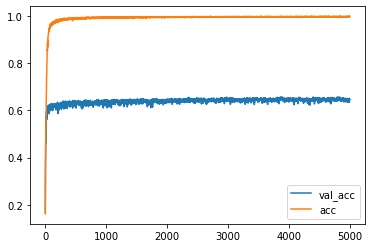

In [21]:
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.legend()

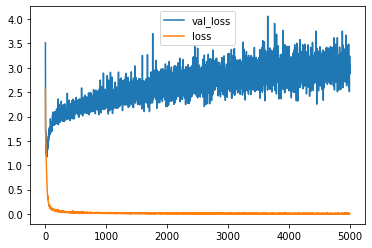

In [22]:
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.legend()

In [23]:
model.evaluate(test_set,steps=10000//batch_size)

200/200 [==============================] - 2s 8ms/step - loss: 3.0364 - acc: 0.6444


[3.036359443664551, 0.6444]

In [24]:
np.array(model.get_weights()).shape

(22,)

In [25]:
epo_h=history.epoch
loss_h=history.history.get('val_loss')
acc_h=history.history.get('val_acc')

arr = np.array([epo_h,loss_h,acc_h])

In [26]:
filename=os.path.join('result','{}_central.batch{}.npy'.format(new_index.shape[0],batch_size))
np.save(filename,arr)
print(filename)

result\4000_central.batch50.npy
